<a href="https://colab.research.google.com/github/SaiMeghanaGoud/EDA-capstone-project/blob/main/Copy_of_Airbnb_Bookings_Analysis___meghna_neha_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
dir_path = '/content/drive/MyDrive/almabetter/Copy of Airbnb NYC 2019.csv'

In [36]:
df1 = pd.read_csv(dir_path)

In [37]:
df=df1

In [38]:
df1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [39]:
df.shape

(48895, 16)

In [40]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [42]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Check for missing values**


In [43]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

It is showing that we have 12 null values in 'name and 16  in 'host_name', 10052 in last_review and 10052 in reviews_per_month


**Visualizing the missing values**

with the help of heat map , we can see the amount of data is missing from the attribute. With this , we can make decisions whether to drop these missing values or to replace them.But dropping the missing values is not advisable but sometimes it may be helpful too.

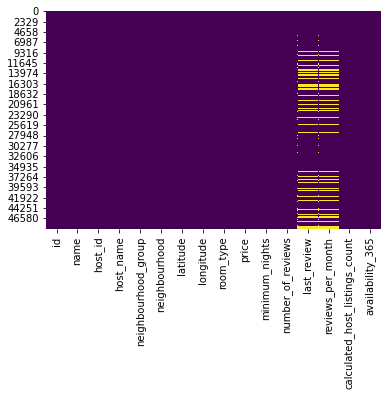

In [ ]:
#spread of missing values
sns.heatmap(df.isnull() ,cbar = False , cmap = 'viridis')

In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Now we can see that there are many missing values in last_reviews and reviews_per_month. we cant drop these columns as it is vary important for our prediction.

In [44]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [46]:
# dropping rows with missing values in name and host_name column
df.dropna(subset=['name'],inplace = True)
df.dropna(subset=['host_name'],inplace = True)

In [47]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [54]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [49]:
#checking unique values in last review

In [50]:
print(list(df['last_review'].unique()))

['2018-10-19', '2019-05-21', nan, '2019-07-05', '2018-11-19', '2019-06-22', '2017-10-05', '2019-06-24', '2017-07-21', '2019-06-09', '2019-06-23', '2018-10-31', '2019-06-29', '2019-06-28', '2019-07-01', '2011-12-28', '2019-01-01', '2019-07-02', '2019-06-19', '2017-08-13', '2019-06-15', '2019-04-19', '2019-06-01', '2019-06-14', '2019-05-12', '2019-06-21', '2019-05-27', '2018-09-30', '2019-06-16', '2019-06-13', '2019-06-05', '2019-05-25', '2017-01-01', '2019-06-17', '2019-07-07', '2019-05-17', '2019-03-25', '2019-05-18', '2019-06-04', '2019-06-30', '2018-11-03', '2019-03-30', '2019-01-26', '2017-09-30', '2019-05-16', '2017-09-24', '2018-05-14', '2019-06-18', '2019-06-26', '2019-01-02', '2019-07-06', '2019-05-31', '2019-05-28', '2019-04-22', '2019-03-23', '2019-04-08', '2016-08-04', '2018-08-09', '2016-02-14', '2019-05-26', '2019-06-27', '2018-07-22', '2018-10-09', '2019-05-01', '2018-10-28', '2019-01-03', '2012-11-01', '2019-05-29', '2018-11-02', '2018-05-26', '2017-03-17', '2019-06-02', 

In [51]:
# filling missing values of last_review variable with mode
df.fillna(df['last_review'].mode()[0], inplace = True)

In [52]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# num_col = ['name' , 'host_name' ,'last_review' , 'reviews_per_month']
# for col in num_col:
#   df[col] = pd.to_numeric(df[col] , errors='coerce')
#   df[col].fillna(df[col].mean() , inplace = True)
# df.head()

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,2019-06-23,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0


In [53]:
print(list(df['reviews_per_month'].unique()))

[0.21, 0.38, '2019-06-23', 4.64, 0.1, 0.59, 0.4, 3.47, 0.99, 1.33, 0.43, 1.5, 1.34, 0.91, 0.22, 1.2, 1.72, 2.12, 4.44, 0.07, 1.09, 0.37, 0.61, 0.73, 1.37, 0.49, 1.11, 0.24, 2.04, 1.42, 1.65, 2.37, 0.66, 1.41, 1.96, 1.81, 2.08, 0.39, 0.23, 0.69, 0.84, 2.25, 0.52, 1.16, 1.01, 0.63, 0.7, 2.82, 0.9, 0.17, 2.49, 1.19, 0.3, 0.12, 0.57, 0.16, 4.72, 1.4, 1.26, 1.64, 1.6, 0.92, 0.2, 1.28, 0.54, 0.62, 0.15, 0.53, 1.73, 0.05, 1.54, 0.28, 3.4, 1.57, 1.05, 0.71, 0.11, 0.27, 1.23, 0.87, 2.09, 0.6, 0.55, 3.02, 0.79, 1.46, 1.61, 3.0, 0.13, 4.22, 0.06, 3.01, 3.2, 2.03, 0.08, 0.19, 0.33, 0.58, 2.35, 1.86, 0.29, 0.45, 0.25, 0.02, 3.89, 0.77, 0.03, 0.04, 0.01, 2.19, 0.74, 0.09, 0.32, 1.24, 2.6, 0.26, 2.86, 2.17, 1.66, 0.94, 1.78, 0.78, 1.06, 2.0, 0.8, 0.75, 0.36, 1.79, 1.92, 1.18, 0.5, 1.17, 0.48, 1.85, 1.04, 1.43, 2.69, 3.52, 0.31, 3.44, 1.0, 1.45, 3.04, 1.22, 1.13, 0.35, 0.65, 1.84, 0.96, 2.1, 4.58, 0.67, 0.18, 1.83, 1.82, 1.3, 0.34, 2.21, 1.8, 2.3, 2.13, 1.44, 1.71, 1.77, 3.19, 4.5, 0.46, 2.39, 1.38, 0

In [ ]:
plt.figure(figsize = (10 , 10))
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')